# סימולציה על מפלגות שלא עוברות בסקרים את אחוז החסימה

הסקרים האחרונים מעידים על מפלגות רבות שלא עוברות את אחוז החסימה. סקרים אלו דוגמים לרוב כ-500 בוחרים ומסיקים מכך על התוצאות הצפויות. במקרה של מפלגות שאינן עוברות על פי הסקר את אחוז החסימה, הסקר עשוי להשפיע על בוחרים שלא לבזבז את קולם ולעבור לתמוך במפלגה אחרת. 
עבודה קצרה זו עוסקת באפשרות של
<br/>
False Negative
<br/>
קרי, שהסקר מעיד על כך שהמפלגה אינה עוברת את אחוז החסימה על אף שאילו היתה נשאלת האוכלוסיה כולה היא דווקא עוברת את הרף של 3.25%
ניתן כמובן להשתמש בכלים תיאורטיים לשם הבחינה הזו, אך בחרתי לבחון זאת באופן שלדעתי מוחשי יותר - באמצעות סימולציה -

# שיטה
הסימולציה תכלול ראשית אוכלוסיה של 6,450,000 בעלי זכות בחירה (כפי שהיו בבחירות 2020, מעוגל)
כיוון שהעניין שלנו הוא במפלגות הקטנות, נניח שישנה תמיכה במספר רב של מפלגות קטנות בקרב האוכלוסיה. לשם הנוחות נקרא למפלגות בשם המעיד על שיעור תמיכה בהן:
- P10 : שיעור תמיכה של 1%
- P12 : שיעור תמיכה של 1.2%
- P14 : שיעור תמיכה של 1.4%
- ...
- ...
- P50 : שיעור תמיכה של 5%
- ...
- ...
- P58 : שיעור תמיכה של 5.8%

<br/>
כל יתר האוכלוסיה (~16% הנותרים) תומכים במפלגות שללא ספק עוברת את אחוז החסימה


C:\Users\rgolan\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


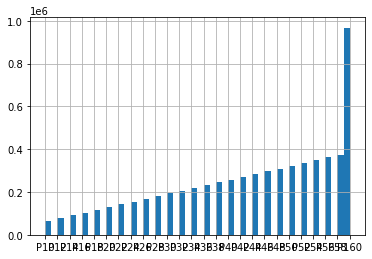

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
Nobs=6450000
promil=Nobs/1000
#רשימה של 6,450,000 בוחרים
df=pd.DataFrame(np.arange(Nobs))
#הזנת ערכים בהתאם לחלוקה מעלה
i=0
df['support']='P160'
for j in range(10, 60, 2):
    party='P'+str(j)
    i_end=int(i+(j/10)*(Nobs/100))
    df.support.iloc[i:i_end]=party
    i=i_end
df.support.hist(bins=50)


כעת נסקור כל פעם 500 תצפיות ונבחן אלו מפלגות עברו בו את אחוז החסימה
- דוגמא בודדת:

In [2]:
pole=df.sample(n=500).groupby(by='support').count()
#.sort_values(by=0)
pole[0]=pole[0].div(pole[0].sum()) # as percentages
pole.columns=['rate_on_pole']
pole['passedThreshold']=np.where(pole['rate_on_pole']>0.0325,1,0)
pole

,rate_on_pole,passedThreshold
support,,
P10,0.012,0
P12,0.006,0
P14,0.022,0
P16,0.018,0
P160,0.160,1
P18,0.022,0
P20,0.024,0
P22,0.022,0
P24,0.022,0


ניתן לראות כאן למשל שמפלגה עם תמיכה בפועל של 4.8%, לפי הסקר לא עברה את אחוז החסימה. מדובר במפלגה שצפויה לקבל כ-6 מושבים... 
עכשיו נבצע את התהליך הזה 1,000 פעמים ונספור את מספר הפעמים שכל מפלגה עברה בסקר את אחוז החסימה

In [3]:

for pole_i in range(1000):
    pole=df.sample(n=500).groupby(by='support').count()
    pole[0]=pole[0].div(pole[0].sum()) # as percentages
    tempName0='rate'+str(pole_i)
    pole.columns=['tempName0']
    tempName='pole'+str(pole_i)
    pole['tempName']=np.where(pole['tempName0']>0.0325,1,0)
    if pole_i==0:
        poles_summary=pole['tempName']
        poles_rate=pole['tempName0']
    else:
        poles_summary=pd.merge(poles_summary,pole['tempName'], how='left', left_index=True, right_index=True)     
        poles_rate=pd.merge(poles_rate,pole['tempName0'], how='left', left_index=True, right_index=True)     

In [4]:
#נחשב את מספר הפעמים (מתוך 1000 סקרים שיצא שהמפלגה עברה את אחוז החסימה)
poles_summary['sum']=poles_summary.sum(axis=1)

# תוצאות 

#### התוצאות הממוצעות בסקרים לפי מפלגה

In [47]:
temp=poles_rate.T.reset_index(drop=True)
Means=pd.DataFrame(temp.mean()).round(3)
Means=Means.drop(index='P160',axis=0)
Means=Means.rename_axis('Party')
Means=Means.rename(columns={0:'Average Support on Poles'})
Means['Standard Deviation']=pd.DataFrame(temp.std()).round(3)
Means

,Average Support on Poles,SD
Party,,
P10,0.010,0.004
P12,0.012,0.005
P14,0.014,0.005
P16,0.016,0.006
P18,0.018,0.006
P20,0.020,0.006
P22,0.022,0.007
P24,0.024,0.007
P26,0.026,0.007


ניתן לראות שבממוצע הסקרים כמובן חסרי הטיה ושבמפלגות הקטנות סטיית התקן היא בסדר גודל של כשליש עד רבע מהממוצע. השונות הגבוהה באופן יחסי מייצרת את הבעיה הנדונה בעבודה זו 

#### טעויות סביב אחוז החסימה 

In [14]:
#נחשב את מספר הפעמים (מתוך 1000 סקרים שיצא שהמפלגה עברה את אחוז החסימה)
summary=poles_summary['sum'].to_frame()
summary=summary.drop(index='P160',axis=0)
#summary=summary[1::]
summary['Real Support [%]']=0
sup_i=1
for i in summary.index:
    summary.loc[i,'Real Support [%]']= sup_i
    sup_i=sup_i+0.2
summary['Above Threshold']=np.where(summary['Real Support [%]']>3.25,True,False)
summary['False Positive Rate [%]']=np.where(summary['Above Threshold']==False,summary['sum']/10,0)
summary['False Negative Rate [%]']=np.where(summary['Above Threshold']==True,(1000-summary['sum'])/10,0)
summary=summary.rename(columns={'sum': '# Passed Threshold 1k Poles'})
summary=summary.rename_axis('Party')
#summary=summary.reset_index().drop('support',axis=1)    
summary

,# Passed Threshold 1k Poles,Real Support [%],Above Threshold,False Positive Rate [%],False Negative Rate [%]
Party,,,,,
P10,0.0,1.0,False,0.0,0.0
P12,0.0,1.2,False,0.0,0.0
P14,0.0,1.4,False,0.0,0.0
P16,3.0,1.6,False,0.3,0.0
P18,4.0,1.8,False,0.4,0.0
P20,33.0,2.0,False,3.3,0.0
P22,59.0,2.2,False,5.9,0.0
P24,122.0,2.4,False,12.2,0.0
P26,156.0,2.6,False,15.6,0.0


### Fasle Positive & False Negative Rates By Real Support Rates

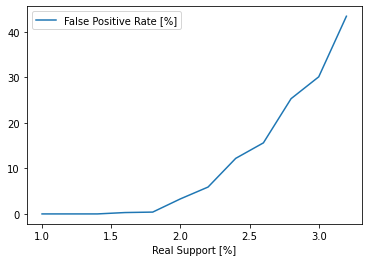

In [15]:
summary[summary['Above Threshold']==False].plot.line(x='Real Support [%]', y='False Positive Rate [%]')

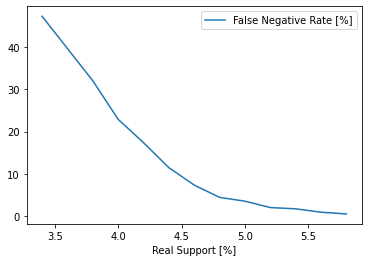

In [16]:
summary[summary['Above Threshold']==True].plot.line(x='Real Support [%]', y='False Negative Rate [%]')

### ממצאים עיקריים:
- מפלגות ממש סביב אחוז החסימה לא יעברו אותו בסקר בכ-50% מהמקרים (כפי שניתן היה לצפות)
- מפלגה עם 2.4% תמיכה תעבור בכ-12% מהסקרים את אחוז החסימה (שהוא 3.25%) False Positive
- מפלגה עם 4.4% תמיכה לא תעבור את אחוז החסימה ב-11% מהסקרים False Negative
- ב-3 מתוך אלף סקרים גם מפלגה עם 1.6% תמיכה בלבד תעבור את אחוז החסימה
- מפלגה עם 5.4% תמיכה לא תעבור את אחוז החסימה ב-2% מהסקרים
- ההסתברות שנראה מפלגה שעברה ב-3 מדגמים בלתי תלויים (3 סקרים שונים) את אחוז החסימה על אף שהתמיכה בה באוכלוסיה רחוק מאחוז החסימה (נניח 2.4%) היא כ-1 לאלף
- 10%-ההסתברות שנראה מפלגה שלא עברה את אחוז החסימה ב-3 מדגמים בלתי תלויים על אף שהתמיכה בה הוא למשל 3.4% (מעל אחוז החסימה) היא כ

#### האם הסקר מאפשר לנו להבחין נכונה בתמיכה במפלגות הקטנות?

In [28]:
temp=poles_rate.T.reset_index(drop=True)

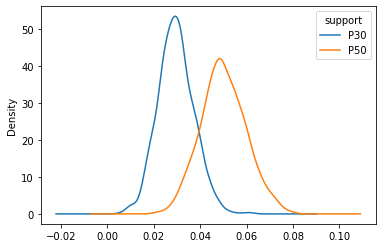

In [27]:
temp[['P30','P50']].plot.density()

  הסימולציה מראה גם שמפלגה עם 5% תמיכה בציבור (הקו הכתום) עשויה בסבירות של כ-1 ל-25 להציג בסקר תוצאות נחותות ממפלגה עם 3% תמיכה בציבור (הקו הכחול)
  ובסבירות גבוהה מכך משמעותית לא ניתן יהיה להבחין מתוך הסקר למי מהן תמיכה נרחבת יותר

In [35]:
temp['P30'][temp['P30']>temp['P50']].count()  #כמה פעמים מתוך 1,000 סקרים יצא שהמפלגה עם 3% תמיכה קיבלה בסקר יותר ממפלגה עם 5% תמיכה 

42

In [37]:
temp['P30'][temp['P20']>temp['P34']].count()  #כמה פעמים מתוך 1,000 סקרים יצא שהמפלגה עם 2% תמיכה קיבלה בסקר יותר ממפלגה עם 3.4% תמיכה

76

ב-1 מכל 13 סקרים מפלגה עם 2 אחוזי תמיכה בפועל (מתחת לאחוז החסימה) תציג תוצאה גבוהה יותר ממפלגה עם 3.4% תמיכה (מעל אחוז החסימה) 

In [39]:
temp['P30'][temp['P16']>temp['P34']].count() #כמה פעמים מתוך 1,000 סקרים יצא שהמפלגה עם 1.6% תמיכה קיבלה בסקר יותר ממפלגה עם 3.4% תמיכה

30

ב-1 מכל 33 סקרים לערך מפלגה עם 1.6 אחוזי תמיכה בפועל (מתחת לאחוז החסימה) תציג תוצאה גבוהה יותר ממפלגה עם 3.4% תמיכה (מעל אחוז החסימה) 

### מה הסיכוי שמפלגה שקיבלה בסקר שיעור תמיכה נמוך מאד למעשה עוברת את אחוז החסימה?

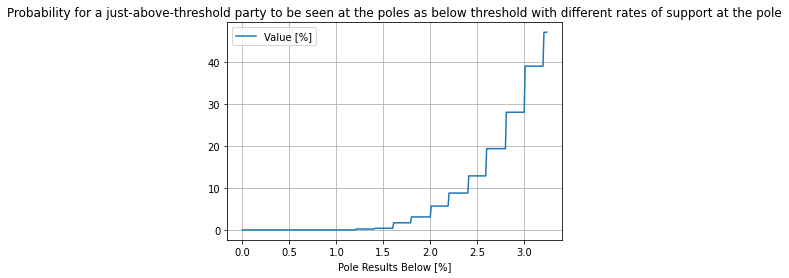

In [72]:
results=pd.DataFrame(np.arange(325)/100)
results2.columns={'Pole Results Below [%]'}
results['Value [%]'] = results.apply(lambda x: temp['P34'][temp['P34']<x['Pole Results Below [%]']/100].count()/10, axis=1)       
results.plot.line(x='Pole Results Below [%]', y='Value [%]', title='Probability for a just-above-threshold party to be seen at the poles as below threshold with different rates of support at the pole', grid=True)

בגרף מעלה מוצגת ההסתברות שמפלגה עם תמיכה של 3.4% באוכלוסיה (מעל אחוז החסימה) תקבל בסקרים לכל היותר שיעורים שונים של תמיכה (הציר האופקי בגרף)
ניתן לראות, למשל, שההסתברות שמפלגה כזו תקבל בסקרים פחות מ-1.2% הוא כמעט אפס, והוא נותרת נמוכה מאד עד כ-1.7% שם עולה ההסתברות לכ-5% (1 מכל 20 סקרים). 
המסקנה היא שמפלגות שמקבלות ערכים נמוכים **מאד** (קטנה מ-1.5%) בסקרים, שיעור זה מייצג נאמנה את העובדה שהסיכוי שהתמיכה בהן באוכלוסיה כולה (ברגע הסקר) לא תאפשר להן לעבור את אחוז החסימה. 
מפלגות שקרובות יותר לאחוז החסימה בסקר, ומקבלות למשל תמיכה של כ-2.5% (3 מנדטים)  - ישנה הסתברות לא מבוטלת שלכ-20% שברגע הסקר למעשה מעל אחוז החסימה.

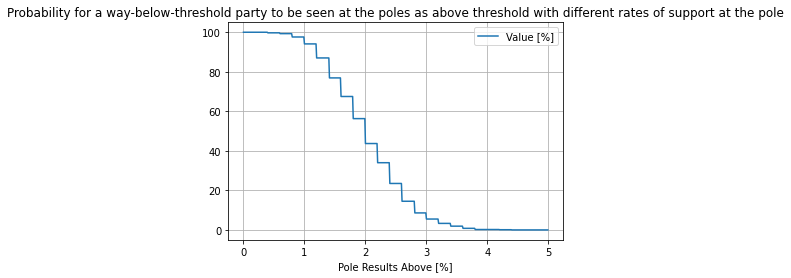

In [82]:
results2=pd.DataFrame(np.arange(500)/100)
results2.columns={'Pole Results Above [%]'}
#results2.head()
results2['Value [%]'] = results2.apply(lambda x: temp['P20'][temp['P20']>x['Pole Results Above [%]']/100].count()/10, axis=1)       
results2.plot.line(x='Pole Results Above [%]', y='Value [%]', title='Probability for a way-below-threshold party to be seen at the poles as above threshold with different rates of support at the pole', grid=True)

מהצד השני - כאשר בוחנים מפלגה עם תמיכה של 2% וההסתברות שתקבל מעל רצף ערכים שונים בסקר, התוצאות מעידות על כך שהסיכוי שמפלגה עם תמיכה של 2% תעבור בסקר את אחוז החסימה הוא כ-6%
ומטה יש את התוצאות הכלליות יותר - עבור שיעורי תמיכה אמיתיים שונים - מהי ההסתברות שהמפלגה תעבור בסקר את אחוז החסימה? 

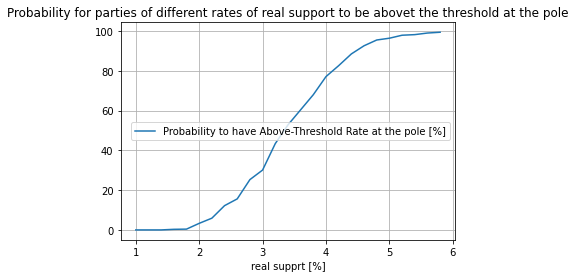

In [93]:
results3=pd.DataFrame(temp.columns)
results3.columns={'Party'}
results3=results3[results3['Party']!='P160']
results3.reset_index(inplace=True)
results3['real supprt [%]']=pd.DataFrame(np.arange(10,60,2)/10)
results3['Probability to have Above-Threshold Rate at the pole [%]'] = results3.apply(lambda x: temp[x['Party']][temp[x['Party']]>0.0325].count()/10, axis=1)       
#results3
results3.plot.line(x='real supprt [%]', y='Probability to have Above-Threshold Rate at the pole [%]', title='Probability for parties of different rates of real support to be abovet the threshold at the pole', grid=True)

### סיכום
- הסקרים חשובים ובמידה רבה יכולים לתת לנו תמונה טובה של המתרחש בשטח גם כאשר המדגם הוא 500 איש בלבד מתוך כ-6.5 מליון בוחרים
- יחד עם זאת, למדגם המצומצם, כפי שהוצג בעבודה קצרה זו, יש עלות - אי דיוק. אי הדיוק הזה משמעותי במיוחד עבור המפלגות הקטנות סביב אחוז החסימה. זה מקבל משנה תוקף כיוון שהסקרים עצמם עשויים לחרוץ את דינן של המפלגות הללו
- יש לציין שבחינה של מספר סקרים בלתי תלויים מצמצת מאד את הסיכוי לטעות
- לבסוף, חשוב להדגיש שבסקרים ישנן בעיות שעבודה זו שנעשתה בתנאים סטריליים לא עסקה בהן כלל - כמו טיב המידע שמספק הנסקר, שונות בהסתברות המותנת להצבעה בפועל (שכן יש שבוחרים שלא להצביע) ואופן הדגימה בסקר